# библиотеки и константы

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import numpy as np
import random
import datetime
from datetime import datetime
import warnings
import os, fnmatch
import yadisk
import shutil
import psycopg2
from sqlalchemy import create_engine
from matplotlib import pyplot as plt 
import seaborn as sns
from tqdm import tqdm

warnings.simplefilter('ignore')
options = webdriver.ChromeOptions()
now = datetime.now()
options.headless = True

token = '*****'
dir_ = "*****"

EXE_PATH = r'C:\chromedriver.exe'

dates = {
    'января':'01',
    'февраля':'02',
    'марта':'03',
    'апреля':'04',
    'мая':'05',
    'июня':'06',
    'июля':'07',
    'августа':'08',
    'сентября':'09',
    'октября':'10',
    'ноября':'11',
    'декабря':'12'
}

host_2 = '*****'
user_2 = '*****'
password_2 = '*****'
db_name_2 = '*****'
port_2 = 5432

connection_2 = psycopg2.connect(
host=host_2,
    user=user_2,
    password=password_2,
    database = db_name_2,
    port=port_2
)


connection_2.autocommit = True

SQL_insert = "INSERT INTO houses_ishevsk (type, adres, area, distance, square, earth_square, earth_type, rooms, floors,\
walls, build_year, price, m_price, house_square_type, earth_square_type, date, url_link, ad_number, description)\
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s,%s,%s, %s, %s);"

db_config = {'user': '*****', # имя пользователя
'pwd': '*****', # пароль
'host': '*****',
'port': 5432, # порт подключения
'db': '*****'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db']) 

engine = create_engine(connection_string)

y = yadisk.YaDisk(token=token)
print(y.check_token())

True


# Функции

In [2]:
def normalize_date(date):
    try:
        return datetime.strptime(date, "%d.%m.%Y")
    except:
        date = date.strftime("%d.%m.%Y")
        return datetime.strptime(date, "%d.%m.%Y")
    
def get_earth_square_type(square):
    if 0 < square <= 500:
        return ('0 - 5 соток')
    if 500 < square <= 2500:
        return ('5 - 25 соток')
    if 2500 < square <= 5000:
        return ('25 - 50 соток')
    if 5000 < square <= 10000:
        return ('50 - 100 соток')
    if square > 10000:
        return ('больше 100 соток')
    
def get_house_square_type(square):
    if 0 < square <= 50:
        return ('0 - 50 кв.м.')
    if 50 < square <= 100:
        return ('50 - 100 кв.м.')
    if 100 < square <= 150:
        return ('100 - 150 кв.м.')
    if 150 < square <= 200:
        return ('150 - 200 кв.м.')
    if square > 200:
        return ('больше 200 кв.м.')


def get_pages_number():
    pages = driver.find_elements("class name", "pagination-item-JJq_j")
    pages_ = []
    for page in pages:    
        if page.text.isdigit():        
            pages_.append(int(page.text))
    return(max(pages_))

def get_norm_links():
    all_links = []
    elems = driver.find_elements("xpath" ,"//a[@href]")
    for elem in elems:
        all_links.append(elem.get_attribute("href"))
    norm_links = []
    for link in all_links:
        if link.split('_')[-1].isdigit():
            norm_links.append(link)
    return(list(set(norm_links)))

def yandex():
    print('Начинаем перенос скринов на Я.диск')
    # Собираем файлы
    files = []
    listOfFiles = os.listdir('screenshots')  
    pattern = "*.png"  
    for entry in listOfFiles:  
        if fnmatch.fnmatch(entry, pattern):            
                files.append(entry)
    # переносим в другую директорию
    for file in files:
        shutil.move('screenshots' +'\\' + file, os.getcwd())
    #записываем на Я.Диск
    c = 0        
    for file in files:
        print(f'Записываем {file}')
        if y.is_file(f'{dir_}{file}'):
            print('Такой уже есть')
            continue
        else:
            c+=1
            y.upload(file, f'{dir_}{file}')
    #удаляем файлы       
    files = []
    listOfFiles = os.listdir('.')  
    pattern = "*.png"  
    for entry in listOfFiles:  
        if fnmatch.fnmatch(entry, pattern):            
                files.append(entry)
    for file in files:
        os.remove(file)

    print(f'{c} файлов записано на Я.Диск')


def get_type():
    try:
        try:
            test = driver.find_element("class name", "style-item-navigation-In5Jr")
            return test.text.split('·')[-1]
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-navigation-3dyI6")
            return test.text.split('·')[-1]
        except:
            pass
    except:
        return(None)

def is_bad_adv(i,j):
    try:
        try:
            driver.find_element("class name", "closed-warning-content-_f4_B").text
            print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
            print(url)
            print('Снято с публикации')
            return(True)
        except:
            pass
        try:
            driver.find_element("class name", "desktop-16c9mq7").text
            print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
            print(url)
            print('Страницы не существует')
            return(True)
        except:
            pass

        try:
            driver.find_element("class name", "closed-warning-content-2ooy4").text
            print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
            print('Снято с публикации')
            print(url)
            return(True)
        except:
            pass

        try:
            driver.find_element("class name", "page-title-count-wQ7pG").text
            print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
            print(url)
            print('Страница поиска, объявления нет')
            return(True)
        except:
            pass
        try:
            driver.find_element("class name", "b-404").text
            print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
            print('Нет такой страницы')
            print(url)
            return(True)
        except:
            return(False)
    except:
        return False

def get_rayon():
    try:
       
        try:
            rayon = driver.find_element("class name", "style-item-address-georeferences-item-18pFt")
            return(rayon.text)
        except:
            pass
        
        try:
            rayon = driver.find_element("class name", "style-item-address-georeferences-item-TZsrp")
            return(rayon.text)
        except:
            pass
    
    except:        
        return(None)
        
def get_adress():
    try:
        try:
            adress = driver.find_element("class name", "style-item-address__string-3Ct0s")
            return(adress.text)
        except:
            pass
        try:
            adress = driver.find_element("class name", "style-item-address__string-wt61A")
            return(adress.text)
        except:
            pass
    except:        
        return(None)
        
def get_params():
    try:
        if len(driver.find_elements("class name", "params-paramsList__item-1Xeok")) > 0:
            params = driver.find_elements("class name", "params-paramsList__item-1Xeok")
            params_ = []
            for param in params:
                params_.append(param.text.split(':'))
            param_list = []
            for param in params_:
                  param_list.extend(param)
            return param_list
        
        if len(driver.find_elements("class name", "params-paramsList-zLpAu")) > 0:
            param_list = driver.find_elements("class name", "params-paramsList-zLpAu")[0].text.replace('\n', ' ').split(' ')
            return param_list
    except:
        print('Ошибка в параметрах')
        print(url)
        return('ERRROR')
    
def get_earth_type(kv_par):
    try:
        try:
            return(kv_par[kv_par.index('(ИЖС)')].strip()).replace('(','').replace(')','')
        except:
            pass 
        try:
            return(kv_par[kv_par.index('(СНТ)')].strip()).replace('(','').replace(')','')
        except:
            pass
        try:
            return(kv_par[kv_par.index('(ДНП)')].strip()).replace('(','').replace(')','')
        except:
            pass
        try:
            kv_par[kv_par.index('фермерское')].strip().replace('(','').replace(')','')
            return('Фермерское хозяйство')
        except:
            pass
    except:
        return None   
    
def get_house_params():
    try:
        if len(driver.find_elements("class name", "style-item-params-list-3YJu7")) > 0:
            house_params = driver.find_elements("class name", "style-item-params-list-3YJu7")
            house_params_ = []

            for param in house_params:
                house_params_.append(param.text.replace('\n',' '))
            if len(house_params_) > 0:
                return(house_params_[0].split(' '))
            else:
                return('ERROR')
        if len(driver.find_elements("class name", "style-item-params-McqZq")) > 0:
            return driver.find_elements("class name", "style-item-params-McqZq")[0].text.replace('\n', ' ').split(' ')[2:]
    except:
        print('Ошибка в параметрах')
        print(url)
        return('ERRROR')
    
def get_earth_square(kv_par):
    try:
        try:
            x = float(kv_par[kv_par.index('участка:')+1].split()[0]) * 100
            return(x)
        except:
            pass
        try:
            x = float(kv_par[kv_par.index('Площадь участка')+1].split()[0]) * 100
            return(x)
        except:
            pass
    except:
        return None
    
    
def get_room(kv_par):
    try:
        try:
            x = kv_par[kv_par.index('комнат:')+1]
            return(x)
        except:
            pass
        try:
            x = int(kv_par[kv_par.index('Количество комнат')+1].strip())
            return(x)
        except:
            pass
        try:
            x = kv_par[kv_par.index('Количество комнат')+1].strip()
            return(x)
        except:
            pass
    except:        
        return(None)

def get_house_type(kv_par): 
    try:
        try:
            x = kv_par[kv_par.index('стен:')+1]
            return(x.strip())
        except:
            pass
        try:
            x = kv_par[kv_par.index('Материал стен')+1]
            return(x.strip())
        except:
            pass
    except:       
        return(None)

def get_floors(kv_par):
    try:
        try:
            x = int(kv_par[kv_par.index('Этажей')+3].strip())
            return(x)
        except:            
            return(None)
        try:
            x = int(kv_par[kv_par.index('Этажей в доме')+1].strip())
            return(x)
        except:            
            return(None)
    except:        
        return(None)


def get_square(kv_par):
    try:
        try:
            x = float(kv_par[kv_par.index('дома:')+1])
            return(x)
        except:
            pass
        try:
            x = float(kv_par[kv_par.index('Площадь дома')+1].split()[0])
            return(x)
        except:
            pass
        try:
            x = float(kv_par[kv_par.index('площадь:')+1])
            return(x)
        except:
            pass
    except:        
        return(None)

def get_year(kv_par):
    try:
        try:
            x = int(kv_par[kv_par.index('постройки:')+1])
            return(x)
        except:
            pass
        try:
            x = int(kv_par[kv_par.index('Год постройки')+1])
            return(x)
        except:
            pass
    except:
        return None

def get_price():
    try:
        try:
            test = driver.find_element("class name", "style-item-view-price-content-1aHxn")
            x = test.text.replace('\n', '').replace(' ', '').split('₽')[0]
            return float(x)
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-price-PuQ0I")
            x = test.text.replace('\n', '').replace(' ', '').split('₽')[0]
            return float(x)
        except:
            pass
    except:
        return None
    
    
def get_view():
    try:
        try:
            test = driver.find_element("class name", "style-item-description-html-qCwUL")
            return(test.text.replace('\n', ' '))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-description-text-mc3G6")
            return(test.text.replace('\n', ' '))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-description-html-1_RNo")
            return(test.text.replace('\n', ' '))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-description-text-SzN56")
            return(test.text.replace('\n', ' '))
        except:
            pass
    except:        
        return(None)

def get_date():
    try:
        #1 ексепт
        try:
            test = driver.find_element("class name", "style-item-metadata-date-1y5w6")
            return(' '.join(test.text.split()[:2]) + ' ' + str(time.localtime().tm_year))
        except:
            pass
        
        # 2 ексепт
        try:
            test = driver.find_element("class name", "style-item-metadata-date-EEthc")
            return(' '.join(test.text.split()[:2]) + ' ' + str(time.localtime().tm_year))
        except:
            pass
        
        #3 ексепт
        try:
            test = driver.find_element("class name", "style-item-footer-3uXQz")
            if 'сегодн' in test.text.split()[3]:
                return(str(now.day) +'.'+  str(now.month)+'.'+ str(now.year))
            if 'вчер' in test.text.split()[3]:                
                return(str(now.day-1) +'.'+  str(now.month)+'.'+ str(now.year))
            else:
                date = (test.text.split()[3]+ ' '+ test.text.split()[4]+' '+ str(now.year))
                date = date.split()
                date[1] = dates[date[1]]
                return('.'.join(date))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-footer-Ufxh_")
            if 'сегодн' in test.text.split()[3]:
                return(str(now.day) +'.'+  str(now.month)+'.'+ str(now.year))
            if 'вчер' in test.text.split()[3]:                
                return(str(now.day-1) +'.'+  str(now.month)+'.'+ str(now.year))
            else:
                date = (test.text.split()[3]+ ' '+ test.text.split()[4]+' '+ str(now.year))
                date = date.split()
                date[1] = dates[date[1]]
                return('.'.join(date))
        except:
            pass
            
    except:        
        return(None)

def get_distance(kv_par):
    try:
        try:
            dist = kv_par[kv_par.index('города:')+1].strip()
            return dist
        except:
            pass
        try:
            dist = kv_par[kv_par.index('Расстояние до центра города')+1].strip()
            return dist
        except:
            pass
    except:
        return(None)

# Links

In [3]:
driver = webdriver.Chrome(executable_path=EXE_PATH, chrome_options=options)
driver.get('https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/prodam-ASgBAgICAUSUA9AQ?cd=1&p=1')
page_numbers = get_pages_number()
print(f'Всего страниц: {page_numbers}')

links = []

for i in tqdm(range(1, page_numbers+1)):
    driver = webdriver.Chrome(executable_path=EXE_PATH, chrome_options=options)
    driver.get(f'https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/prodam-ASgBAgICAUSUA9AQ?cd=1&p={i}')
    links.extend(get_norm_links())
    driver.close()
    time.sleep(random.randint(5,12))

links = set(links)

with connection_2.cursor() as cursor:
                    cursor.execute(
                    'TRUNCATE TABLE houses_new_links'
                    )
        
query = "SELECT * FROM houses_ishevsk"
old_links = list(pd.io.sql.read_sql(query, con = engine)['url_link'].values)

for link in links:
    if link in old_links:
        continue
    else:
        with connection_2.cursor() as cursor:
                    cursor.execute(
                    f'''INSERT INTO houses_new_links (links) VALUES ('{link}')'''
                    )
query = "SELECT links FROM houses_new_links"
print(f'Новых линков: {len(list(pd.io.sql.read_sql(query, con = engine)["links"].values))}')

Всего страниц: 57


100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [51:06<00:00, 53.80s/it]


Новых линков: 525


# Парсинг карточек

In [7]:
# сброс счетчика

counts_ = '0'

with connection_2.cursor() as cursor:
    cursor.execute(
    f'''UPDATE houses_counts
    SET count = {counts_}'''
    )

In [8]:
query = "SELECT * FROM houses_counts"
test = pd.io.sql.read_sql(query, con = engine) 
i = int(test['count'].values[0])
i

0

## Сам парсер

In [9]:

query = "SELECT links FROM houses_new_links"
test = pd.io.sql.read_sql(query, con = engine) 
links = list(pd.io.sql.read_sql(query, con = engine)['links'].values) 

query = "SELECT * FROM houses_counts"
test = pd.io.sql.read_sql(query, con = engine) 
i = int(test['count'].values[0])
# Пустой ДФ

df = {}
df['Тип недвижимости'] = []
df['Адрес'] = []
df['Район'] = []
df['Расстояние до центра города'] = []
df['Площадь дома'] = []
df['Площадь ЗУ'] = []
df['Тип ЗУ'] = []
df['Количество комнат'] = []
df['Этажность'] = []
df['Материал стен'] = []
df['Год постройки'] = []
df['Стоимость'] = []
df['Метр квадратный'] = []
df['Группа площади дома'] = []
df['Группа площади зу'] = []
df['Дата объявления'] = []
df['Ссылка'] = []
df['номер объявления'] = []
df['Описание'] = []


#data = pd.read_csv('data.csv', index_col=0)
options.headless = True
c = 0
for j,url in enumerate (links[i:]):
    driver = webdriver.Chrome(executable_path=EXE_PATH, chrome_options=options)
    driver.get(url)
    if c == 3:
        print('!!!Много None подряд!!!')
        break
    
    if j % 10 == 0 and j > 1:
              
        counts_ = str(i+j)

        with connection_2.cursor() as cursor:
            cursor.execute(
            f'''UPDATE houses_counts
            SET count = {counts_}'''
            )
        
        #каждые 25 иттераций записываем DF и счетчик
        #df = pd.DataFrame(df)
        #data = pd.concat([data, df])
        #data.to_csv('data.csv')
        #data.to_excel('data.xlsx')
        print(f'Данные и счетчик записаны на {j+i} позиции')
        df = pd.DataFrame(df)
        for q in range (len(df)):
            values_ = []
            for value in df.loc[q].values:
                values_.append(str(value))
            with connection_2.cursor() as cursor:
                    cursor.execute(
                    SQL_insert, [*values_]
                    )
        print(f'Записано в бд')
        
        df = {}
        df['Тип недвижимости'] = []
        df['Адрес'] = []
        df['Район'] = []
        df['Расстояние до центра города'] = []
        df['Площадь дома'] = []
        df['Площадь ЗУ'] = []
        df['Тип ЗУ'] = []
        df['Количество комнат'] = []
        df['Этажность'] = []
        df['Материал стен'] = []
        df['Год постройки'] = []
        df['Стоимость'] = []
        df['Метр квадратный'] = []
        df['Группа площади дома'] = []
        df['Группа площади зу'] = []
        df['Дата объявления'] = []
        df['Ссылка'] = []
        df['номер объявления'] = []
        df['Описание'] = []
        
        yandex()
        
        
    if is_bad_adv(i,j): 
        driver.close()
        time.sleep(2)
        continue     
    try:            
        kv_par = get_params()
        house_par = get_house_params()
        #print('---'*22)
        df['Тип недвижимости'].append(get_type())
        df['Адрес'].append(get_adress())
        df['Район'].append(get_rayon())
        df['Расстояние до центра города'].append(get_distance(kv_par))
        df['Площадь дома'].append(get_square(kv_par))
        df['Площадь ЗУ'].append(get_earth_square(kv_par))
        df['Тип ЗУ'].append(get_earth_type(kv_par))
        df['Количество комнат'].append(get_room(kv_par))
        df['Этажность'].append(get_floors(kv_par))
        df['Материал стен'].append(get_house_type(kv_par))        
        df['Год постройки'].append(get_year(kv_par))        
        df['Стоимость'].append(get_price())
             
        try:
            df['Метр квадратный'].append(df['Стоимость'][-1]/df['Площадь дома'][-1])
        except:
            print('Ошибка в определении стоимости метра кв.')
            df['Метр квадратный'].append(None)
        try:
            df['Группа площади дома'].append(get_house_square_type(df['Площадь дома'][-1]))
        except:
            df['Группа площади дома'].append(None)
        try:
            df['Группа площади зу'].append(get_earth_square_type(df['Площадь ЗУ'][-1]))
        except:
            df['Группа площади зу'].append(None)
        df['Дата объявления'].append(get_date())
        df['Ссылка'].append(url)
        df['Описание'].append(get_view())
        df['номер объявления'].append(df['Ссылка'][-1].split('_')[-1])
        
        print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
        if df["Тип недвижимости"][-1] == None:
            print(f'Тип недвижимости: {df["Тип недвижимости"][-1]}')
        if df["Адрес"][-1] == None:
            print(f'Адрес: {df["Адрес"][-1]}')
        if df["Район"][-1] == None:
            print(f'Район: {df["Район"][-1]}')
        if df["Расстояние до центра города"][-1] == None:
            print(f'Расстояние до центра города: {df["Расстояние до центра города"][-1]}')
        if df["Количество комнат"][-1] == None:
            print(f'Количество комнат: {df["Количество комнат"][-1]}')
        if df["Площадь дома"][-1] == None:
            c += 1
            print(f'Площадь дома: {df["Площадь дома"][-1]}')
        else:
            c = 0
        if df["Площадь ЗУ"][-1] == None:
            print(f'Площадь ЗУ: {df["Площадь ЗУ"][-1]}')
        if df["Тип ЗУ"][-1] == None:
            print(f'Тип ЗУУ: {df["Тип ЗУ"][-1]}')
        if df["Этажность"][-1] == None:
            print(f'Этажность: {df["Этажность"][-1]}')
        if df["Год постройки"][-1] == None:
            print(f'Год постройки: {df["Год постройки"][-1]}')
        if df["Материал стен"][-1] == None:
            print(f'Материал стен: {df["Материал стен"][-1]}')
        if df["Стоимость"][-1] == None:
            print(f'Стоимость: {df["Стоимость"][-1]}')
        if df["Группа площади дома"][-1] == None:
            print(f'Группа площади дома: {df["Группа площади дома"][-1]}')
        if df["Группа площади зу"][-1] == None:
            print(f'Группа площади зу: {df["Группа площади зу"][-1]}')
        if df["Дата объявления"][-1] == None:
            print(f'Дата объявления: {df["Дата объявления"][-1]}')
        if df["Описание"][-1] == None:
            print(f'Описание: {df["Описание"][-1]}')
        print(f'Ссылка: {df["Ссылка"][-1]}')
        
                        
        S = lambda X: driver.execute_script('return document.body.parentNode.scroll'+X)
        driver.set_window_size(S('Width'),S('Height')) # May need manual adjustment                                                                                                                
        driver.find_element('tag name' ,'body').screenshot(f'screenshots/{url.split("_")[-1]}.png')
        print('Скриншот сделан')
        driver.quit()
        
        print()
        
        #print('---'*22)
        

    except:
        print('Тут что-то пошло не так (ошибка с вылетом скрипта):')
        print(url)
        now = datetime.datetime.now()        
        driver.save_screenshot(f'screenshots/ERRRORS/{str(now.hour)+"_"+str(now.minute)}.png') 
        break
        
        #j +=1
    
    time.sleep(random.randint(10,19))
else:    

    df = pd.DataFrame(df)
    for q in range (len(df)):
        values_ = []
        for value in df.loc[q].values:
            values_.append(str(value))
        with connection_2.cursor() as cursor:
                cursor.execute(
                SQL_insert, [*values_]
                )

    
    yandex()

    print('###'*22)
    print('#'+' '*64+'#')
    print('#'+ ' ' *20 + 'СКРИПТ ОКОНЧИЛ РАБОТУ!' + ' '*22 + '#')
    print('#'+' '*64+'#')
    print('###'*22)

****************************************** № 0 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_60_m_na_uchastke_8_sot._2561413535
Скриншот сделан

****************************************** № 1 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_20m_na_uchastke_55sot._2564244480
Скриншот сделан

****************************************** № 2 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_86_m_na_uchastke_10_sot._2497395728
Скриншот сделан

****************************************** № 3 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_22m_na_uchastke_4sot._2574249619
Скриншот сделан

****************************************** № 4 из 525 ************

Записываем 2479657585.png
Такой уже есть
Записываем 2500810117.png
Такой уже есть
Записываем 2518908535.png
Такой уже есть
Записываем 2544879362.png
Записываем 2545576995.png
Записываем 2549801700.png
Записываем 2551253999.png
7 файлов записано на Я.Диск
****************************************** № 30 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_48m_na_uchastke_15sot._2512767020
Скриншот сделан

****************************************** № 31 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_270m_na_uchastke_15sot._2159091558
Скриншот сделан

****************************************** № 32 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_112_m_na_uchastke_135_sot._2194642599
Скриншот сделан

*******************

Скриншот сделан

****************************************** № 59 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_47m_na_uchastke_5sot._1954378943
Скриншот сделан

Данные и счетчик записаны на 60 позиции
Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 1951927006.png
Такой уже есть
Записываем 1954378943.png
Такой уже есть
Записываем 2107613687.png
Такой уже есть
Записываем 2257467424.png
Записываем 2337110192.png
Такой уже есть
Записываем 2398568132.png
Такой уже есть
Записываем 2499784234.png
Такой уже есть
Записываем 2528181196.png
Такой уже есть
Записываем 2535409330.png
Такой уже есть
Записываем 2562129144.png
Такой уже есть
1 файлов записано на Я.Диск
****************************************** № 60 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_210m_na_

Скриншот сделан

****************************************** № 86 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_200_m_na_uchastke_15_sot._1607869353
Скриншот сделан

****************************************** № 87 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_31_m_na_uchastke_8_sot._2578757456
Скриншот сделан

****************************************** № 88 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_47m_na_uchastke_16sot._1742046691
Скриншот сделан

****************************************** № 89 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_164m_na_uchastke_6sot._2300744494
Скриншот сделан

Данные и счетчик з

Скриншот сделан

****************************************** № 114 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_50_m_na_uchastke_6_sot._2445489790
Скриншот сделан

****************************************** № 115 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_65m_na_uchastke_6sot._1947514382
Скриншот сделан

****************************************** № 116 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_623_m_na_uchastke_48_sot._2513560405
Скриншот сделан

****************************************** № 117 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_125m_na_uchastke_101sot._2497558203
Скриншот сдел

Скриншот сделан

****************************************** № 142 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_100_m_na_uchastke_8_sot._2143679586
Скриншот сделан

****************************************** № 143 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_43m_na_uchastke_47sot._2234915005
Скриншот сделан

****************************************** № 144 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_40m_na_uchastke_3sot._2519164321
Скриншот сделан

****************************************** № 145 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_4

Такой уже есть
Записываем 2533938515.png
Записываем 2545024778.png
Записываем 2545442674.png
6 файлов записано на Я.Диск
****************************************** № 170 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_876_m_na_uchastke_38_sot._2561637794
Скриншот сделан

****************************************** № 171 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_32m_na_uchastke_8sot._2130411816
Скриншот сделан

****************************************** № 172 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_60m_na_uchastke_8sot._2452697185
Скриншот сделан

****************************************** № 173 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_190_m_

Скриншот сделан

Данные и счетчик записаны на 200 позиции
Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 1517508478.png
Записываем 2238088355.png
Такой уже есть
Записываем 2278920245.png
Записываем 2417044138.png
Записываем 2448154645.png
Такой уже есть
Записываем 2454221628.png
Такой уже есть
Записываем 2457463433.png
Такой уже есть
Записываем 2542618798.png
Записываем 2556290270.png
Записываем 2561029608.png
6 файлов записано на Я.Диск
****************************************** № 200 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_48_m_na_uchastke_7_sot._1949560592
Скриншот сделан

****************************************** № 201 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_3371_m_na_uchastke_365_sot._2465433697
Скриншот сделан

******************************************

Скриншот сделан

****************************************** № 228 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_123m_na_uchastke_12sot._2545236957
Скриншот сделан

****************************************** № 229 из 525 ******************************************
https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_2679_m_na_uchastke_6_sot._2555437841
Снято с публикации
Данные и счетчик записаны на 230 позиции
Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 1059166340.png
Такой уже есть
Записываем 1992913003.png
Такой уже есть
Записываем 2180657109.png
Такой уже есть
Записываем 2385281273.png
Записываем 2462669086.png
Такой уже есть
Записываем 2479072455.png
Такой уже есть
Записываем 2545236957.png
Такой уже есть
Записываем 2552797784.png
Такой уже есть
Записываем 2566018456.png
2 файлов записано на Я.Диск
****************************************** № 230 из 525 ****************

Скриншот сделан

****************************************** № 257 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_30_m_na_uchastke_55_sot._2529278871
Скриншот сделан

****************************************** № 258 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_35_m_na_uchastke_12_sot._2564626781
Скриншот сделан

****************************************** № 259 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_30m_na_uchastke_4sot._2425481227
Скриншот сделан

Данные и счетчик записаны на 260 позиции
Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 2425481227.png
Такой уже есть
Записываем 2489337124.png
Такой уже есть
Записываем 2493964371.png
Такой уже есть
Записываем 2501036533.png
Такой уже есть
Записы

Скриншот сделан

****************************************** № 284 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_40m_na_uchastke_3sot._2503253928
Скриншот сделан

****************************************** № 285 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_98_m_na_uchastke_15_sot._2491227403
Скриншот сделан

****************************************** № 286 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_30m_na_uchastke_6sot._2545320604
Скриншот сделан

****************************************** № 287 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_105m_na_uchastke_75sot._2557477340
Скриншот сделан

****************************************** № 288 из 525 **********

Скриншот сделан

****************************************** № 312 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_104m_na_uchastke_4sot._2242520989
Скриншот сделан

****************************************** № 313 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_30_m_na_uchastke_97_sot._2162732173
Скриншот сделан

****************************************** № 314 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_180m_na_uchastke_11sot._2283589751
Скриншот сделан

****************************************** № 315 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_20m_na_uchastke_5sot._

Записываем 884791611.png
Такой уже есть
5 файлов записано на Я.Диск
****************************************** № 340 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_50m_na_uchastke_8sot._2405267146
Скриншот сделан

****************************************** № 341 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_25_m_na_uchastke_35_sot._2433745885
Скриншот сделан

****************************************** № 342 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_608m_na_uchastke_6sot._2541420726
Скриншот сделан

****************************************** № 343 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/da

Скриншот сделан

Данные и счетчик записаны на 370 позиции
Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 1942645185.png
Такой уже есть
Записываем 2157248389.png
Записываем 2273987074.png
Такой уже есть
Записываем 2414556008.png
Такой уже есть
Записываем 2444333510.png
Такой уже есть
Записываем 2500693092.png
Такой уже есть
Записываем 2533045084.png
Записываем 2536429144.png
Такой уже есть
Записываем 2553118305.png
Записываем 2578347887.png
4 файлов записано на Я.Диск
****************************************** № 370 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_1118_m_na_uchastke_8_sot._2582253239
Скриншот сделан

****************************************** № 371 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_130m_na_uchastke_12sot._2526326625
Скриншот сделан

**************************************

Скриншот сделан

****************************************** № 398 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_116m_na_uchastke_108sot._2545111867
Скриншот сделан

****************************************** № 399 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_120m_na_uchastke_10sot._2355716996
Скриншот сделан

Данные и счетчик записаны на 400 позиции
Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 1078371003.png
Такой уже есть
Записываем 1789188720.png
Записываем 2355716996.png
Такой уже есть
Записываем 2441734671.png
Такой уже есть
Записываем 2494415041.png
Такой уже есть
Записываем 2524742129.png
Такой уже есть
Записываем 2545111867.png
Записываем 2545273642.png
Записываем 2545756241.png
Записываем 2560709558.png
5 файлов записано на Я.Диск
****************************************** № 400 из 52

Скриншот сделан

****************************************** № 427 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_119m_na_uchastke_5sot._2304200542
Скриншот сделан

****************************************** № 428 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_260_m_na_uchastke_18_sot._2267250870
Скриншот сделан

****************************************** № 429 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_30m_na_uchastke_35sot._2249563600
Скриншот сделан

Данные и счетчик записаны на 430 позиции
Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 2147431774.png
Такой уже есть
Записываем 2249563600.png
Такой уже есть
Записываем 2267250870.p

Скриншот сделан

****************************************** № 456 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_234_m_na_uchastke_10_sot._2450244412
Скриншот сделан

****************************************** № 457 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_30m_na_uchastke_30sot._2593874495
Скриншот сделан

****************************************** № 458 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_24m_na_uchastke_4sot._2540732790
Скриншот сделан

****************************************** № 459 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_30_m_na_uchastke_4_sot._2437019003
Скриншот сделан

Данные и счетчик записаны на 460 позиции
З

Скриншот сделан

****************************************** № 485 из 525 ******************************************
Район: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_97m_na_uchastke_10sot._2560251771
Скриншот сделан

****************************************** № 486 из 525 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_102_m_na_uchastke_10_sot._2202269865
Скриншот сделан

****************************************** № 487 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_120_m_na_uchastke_12_sot._2561288999
Скриншот сделан

****************************************** № 488 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_109m_na_uchastke_8sot._2436923361
Скриншот сделан

***************************************

Скриншот сделан

****************************************** № 514 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/kottedzh_300_m_na_uchastke_15_sot._647553685
Скриншот сделан

****************************************** № 515 из 525 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_20m_na_uchastke_4sot._2544653732
Скриншот сделан

****************************************** № 516 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dom_120m_na_uchastke_14sot._2398402864
Скриншот сделан

****************************************** № 517 из 525 ******************************************
Расстояние до центра города: None
Год постройки: None
Ссылка: https://www.avito.ru/izhevsk/doma_dachi_kottedzhi/dacha_30_m_na_uchastke_4_sot._1951966259
Скриншот

# Предобработка

In [11]:
query = "SELECT * FROM houses_ishevsk"
df = pd.io.sql.read_sql(query, con = engine)
df = df[df.columns[1:]]

In [12]:
cols = df.columns
for col in cols:
    print(f'{col}: {df[col].isna().sum()}')

type: 0
adres: 0
area: 0
distance: 0
square: 0
earth_square: 0
earth_type: 0
rooms: 0
floors: 0
walls: 0
build_year: 0
price: 0
m_price: 0
house_square_type: 0
earth_square_type: 0
date: 0
url_link: 0
ad_number: 0
description: 0


In [15]:
for col in cols:
    print(f'{col}: {df[df[col] == "None"]["ad_number"].count()}')

type: 0
adres: 0
area: 1882
distance: 1139
square: 0
earth_square: 0
earth_type: 0
rooms: 16
floors: 0
walls: 0
build_year: 9
price: 0
m_price: 0
house_square_type: 0
earth_square_type: 0
date: 0
url_link: 0
ad_number: 0
description: 0


In [14]:
df.drop(labels = df[df['m_price'] == 'nan'].index ,axis = 0, inplace=True)
df.drop(labels = df[df['date'] == 'None'].index ,axis = 0, inplace=True)
df.drop(labels = df[df['earth_type'] == 'None'].index ,axis = 0, inplace=True)

In [17]:
df['datetime'] = df['date'].apply(normalize_date)
df['square'] = df['square'].apply(float)
df['price'] = df['price'].apply(float)
df['m_price'] = df['m_price'].apply(float)

# Общий анализ Анализ

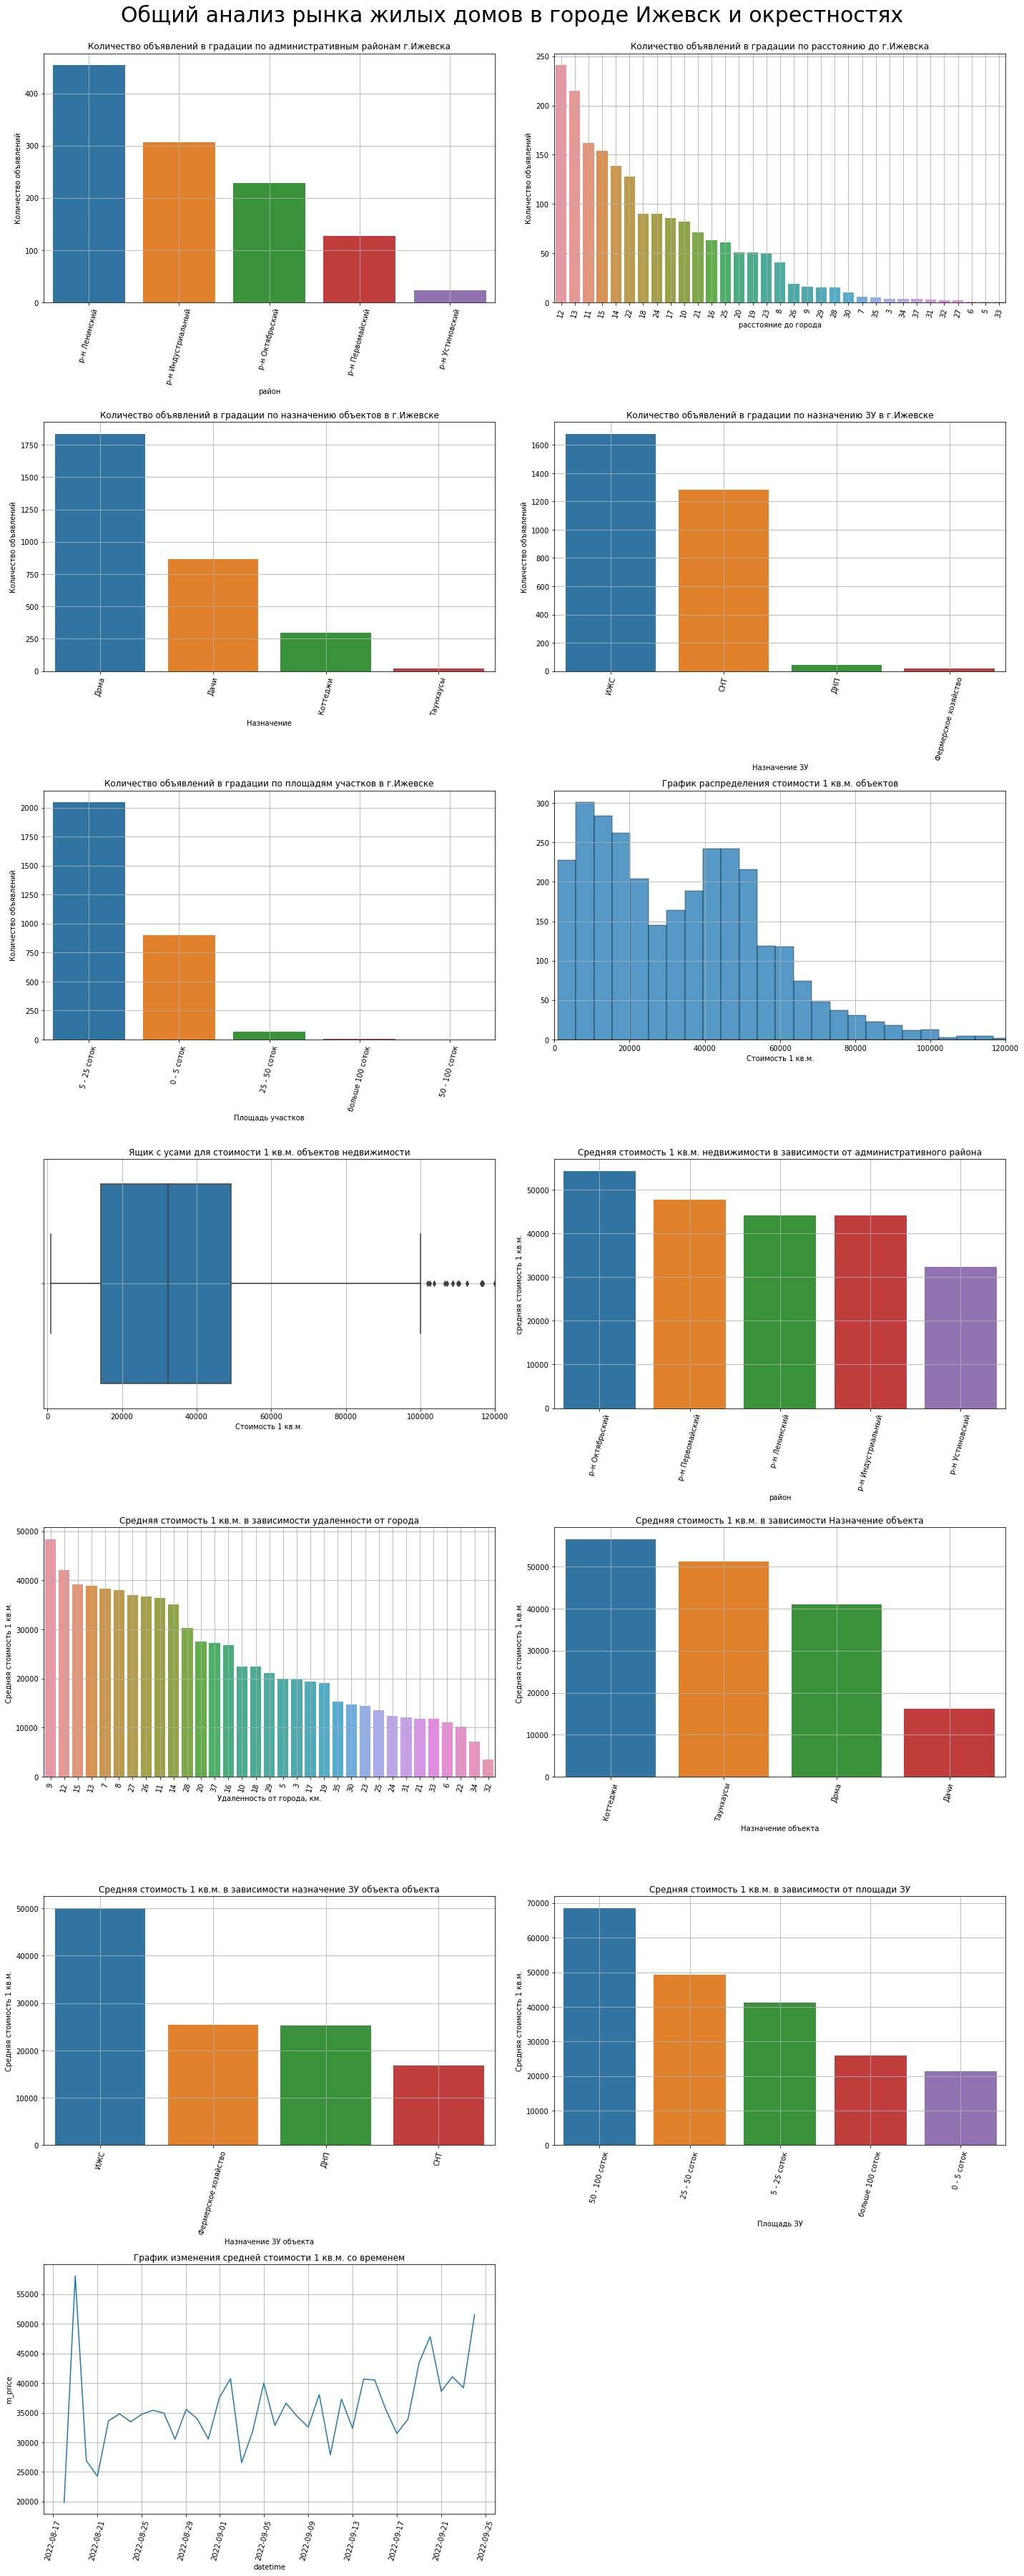

In [18]:
plt.figure(figsize=(20,50))
plt.suptitle('Общий анализ рынка жилых домов в городе Ижевск и окрестностях',
             y = 1,
             fontsize = 30)
draw = df.groupby('area')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'area': 'район', 'price': 'Количество объявлений'})
draw = draw[draw['район'] != 'None']
sns.barplot(draw['район'], draw['Количество объявлений'], ax=plt.subplot(7, 2, 1))
plt.title('Количество объявлений в градации по административным районам г.Ижевска')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('distance')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'distance': 'расстояние до города', 'price': 'Количество объявлений'})
draw = draw[draw['расстояние до города'] != 'None']
sns.barplot(draw['расстояние до города'], draw['Количество объявлений'], ax=plt.subplot(7, 2, 2))
plt.title('Количество объявлений в градации по расстоянию до г.Ижевска')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('type')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'type': 'Назначение', 'price': 'Количество объявлений'})
draw = draw[draw['Назначение'] != '']
sns.barplot(draw['Назначение'], draw['Количество объявлений'], ax=plt.subplot(7, 2, 3))
plt.title('Количество объявлений в градации по назначению объектов в г.Ижевске')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('earth_type')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'earth_type': 'Назначение ЗУ', 'price': 'Количество объявлений'})
sns.barplot(draw['Назначение ЗУ'], draw['Количество объявлений'], ax=plt.subplot(7, 2, 4))
plt.title('Количество объявлений в градации по назначению ЗУ в г.Ижевске')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('earth_square_type')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'earth_square_type': 'Площадь участков', 'price': 'Количество объявлений'})
sns.barplot(draw['Площадь участков'], draw['Количество объявлений'], ax=plt.subplot(7, 2, 5))
plt.title('Количество объявлений в градации по площадям участков в г.Ижевске')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

sns.histplot(df['m_price'], ax=plt.subplot(7, 2, 6))
plt.grid()
plt.xlim(0,120000)
#plt.xticks(range(0,30000, 1000), rotation=75)
plt.title('График распределения стоимости 1 кв.м. объектов')
plt.ylabel(None)
plt.xlabel('Стоимость 1 кв.м.')
plt.tight_layout()

sns.boxplot(df['m_price'], ax=plt.subplot(7, 2, 7))
plt.grid()
plt.xlim(-1000,120000)
#plt.xticks(range(0,220000, 10000), rotation=75)
plt.title('Ящик с усами для стоимости 1 кв.м. объектов недвижимости')
plt.ylabel(None)
plt.xlabel('Стоимость 1 кв.м.')
plt.tight_layout()

draw = df.groupby('area')['m_price'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)\
.reset_index().rename(columns={'area': 'район', 'mean': 'средняя стоимость 1 кв.м.', 'median': 'медианная стоимость 1 кв.м.'})
draw = draw[draw['район'] != 'None']
sns.barplot(draw['район'], draw['средняя стоимость 1 кв.м.'], ax=plt.subplot(7, 2, 8))
plt.title('Средняя стоимость 1 кв.м. недвижимости в зависимости от административного района')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('distance')['m_price'].mean().reset_index().sort_values(by='m_price', ascending=False)\
.rename(columns={'distance': 'Удаленность от города, км.', 'm_price': 'Средняя стоимость 1 кв.м.'})
draw = draw[draw['Удаленность от города, км.'] != 'None']
sns.barplot(draw['Удаленность от города, км.'], draw['Средняя стоимость 1 кв.м.'], ax=plt.subplot(7, 2, 9))
plt.title('Средняя стоимость 1 кв.м. в зависимости удаленности от города')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('type')['m_price'].mean().reset_index().sort_values(by='m_price', ascending=False)\
.rename(columns={'type': 'Назначение объекта', 'm_price': 'Средняя стоимость 1 кв.м.'})
draw = draw[draw['Назначение объекта'] != '']
sns.barplot(draw['Назначение объекта'], draw['Средняя стоимость 1 кв.м.'], ax=plt.subplot(7, 2, 10))
plt.title('Средняя стоимость 1 кв.м. в зависимости Назначение объекта')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('earth_type')['m_price'].mean().reset_index().sort_values(by='m_price', ascending=False)\
.rename(columns={'earth_type': 'Назначение ЗУ объекта', 'm_price': 'Средняя стоимость 1 кв.м.'})
draw = draw[draw['Назначение ЗУ объекта'] != '']
sns.barplot(draw['Назначение ЗУ объекта'], draw['Средняя стоимость 1 кв.м.'], ax=plt.subplot(7, 2, 11))
plt.title('Средняя стоимость 1 кв.м. в зависимости назначение ЗУ объекта объекта')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('earth_square_type')['m_price'].mean().reset_index().sort_values(by='m_price', ascending=False)\
.rename(columns={'earth_square_type': 'Площадь ЗУ', 'm_price': 'Средняя стоимость 1 кв.м.'})
sns.barplot(draw['Площадь ЗУ'], draw['Средняя стоимость 1 кв.м.'], ax=plt.subplot(7, 2, 12))
plt.title('Средняя стоимость 1 кв.м. в зависимости от площади ЗУ')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()


draw = df[['datetime','m_price']].groupby('datetime')['m_price'].mean()[1:-1].reset_index().sort_values(by='datetime')
sns.lineplot(data=draw, x='datetime', y = 'm_price', ax=plt.subplot(7, 2, 13))
plt.title('График изменения средней стоимости 1 кв.м. со временем')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()
